<a href="https://colab.research.google.com/github/eporrasm/kaggle-tae/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import testing
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files


uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded["train.csv"]))
uploaded = files.upload()
test= pd.read_csv(io.BytesIO(uploaded["test.csv"]))
uploaded = files.upload()
sample_submission = pd.read_csv(io.BytesIO(uploaded["sample_submission.csv"]))

Saving train.csv to train.csv


Saving test.csv to test.csv


Saving sample_submission.csv to sample_submission.csv


In [2]:
train.shape

(3911, 8)

In [3]:
test.shape

(3, 2)

In [4]:
sample_submission.shape

(3, 7)

In [5]:
train.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [6]:
test.isna().sum()

text_id      0
full_text    0
dtype: int64

In [7]:
sample_submission.isna().sum()

text_id        0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [8]:
train["full_text"][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [9]:
import re

clean_train = train.copy()
clean_test = test.copy()
clean_train['full_text'] = train["full_text"].replace(re.compile(r'(\\n)|[\n\r\t]'), '', regex=True)
clean_test['full_text'] = test["full_text"].replace(re.compile(r'(\\n)|[\n\r\t]'), '', regex=True)

In [10]:
clean_train["full_text"][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a sh

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


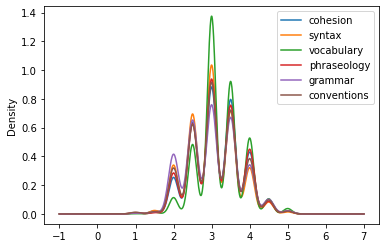

In [12]:
train.plot.kde()

In [13]:
train['ncaracteres'] = train['full_text'].str.len()
promedio_caract = round(train['ncaracteres'].mean())
max_caract = round(train['ncaracteres'].max())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


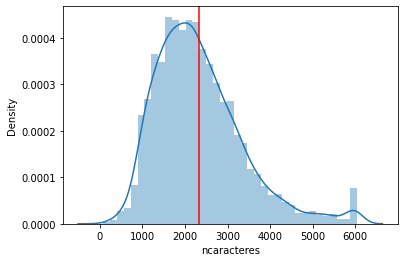

In [14]:
sns.distplot(train['ncaracteres'])
plt.axvline(x = promedio_caract, color = 'red')

In [15]:
train['npalabra'] = train['full_text'].apply(lambda x: len(x.split()))
promedio_pala = round(train['npalabra'].mean())
max_pala = round(train['npalabra'].max())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


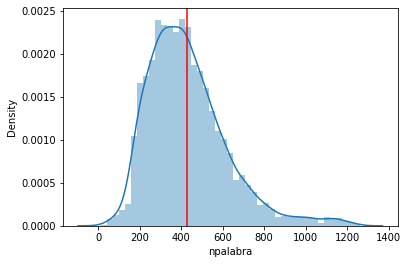

In [16]:
sns.distplot(train['npalabra'])
plt.axvline(x = promedio_pala, color = 'red')

Removing Stopwords and Punctuation

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
def remove_swp(text):
    text_nlp = nlp(text)
    filtered_text= [token for token in text_nlp if not token.is_stop]
    filtered_text=[token.text for token in filtered_text if not token.is_punct]
    filtered_text = " ".join(filtered_text)
    return filtered_text

clean_train["full_text"] = clean_train["full_text"].apply(remove_swp)
clean_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,think students benefit learning home wo nt cha...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,Dear PrincipalIf u change school policy having...,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,best time life agree greatest accomplishment w...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#max_palabras = train["npalabra"].max()
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(clean_train['full_text'])

secuencia_train = tokenizer.texts_to_sequences(clean_train['full_text'])
rellenos_train = pad_sequences(secuencia_train, maxlen=max_pala, truncating='post')

index_palabras = tokenizer.word_index

print(rellenos_train)


[[   0    0    0 ...  139 1535   27]
 [   0    0    0 ...  117    2   12]
 [   0    0    0 ...   75  165  103]
 ...
 [   0    0    0 ...   97 1364  755]
 [   0    0    0 ...    2  783 1426]
 [   0    0    0 ...   16 1265 1359]]


In [19]:
X_train = rellenos_train
y = [train['cohesion'].values, train['syntax'].values, train['vocabulary'].values,
      train['phraseology'].values, train['grammar'].values, train['conventions'].values]


In [32]:
def modelo_lstm_definido():

    cuenta_index_palabras = len(index_palabras)

    inputs = tf.keras.layers.Input(shape=(max_pala))
    embeddings = tf.keras.layers.Embedding(cuenta_index_palabras + 1, 512, input_length=max_pala)(inputs)

    Bidilayers = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True))(embeddings)
    Bidilayers = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(Bidilayers)
    Bidilayers = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(Bidilayers)
    Bidilayers = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(Bidilayers)
    
    

    cohesion = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # cohesion = tf.keras.layers.Dropout(0.4)(cohesion)
    # cohesion = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(cohesion)
    cohesion = tf.keras.layers.Dropout(0.4)(cohesion)
    cohesion = tf.keras.layers.Dense(1, activation='relu', name='cohesion')(cohesion)
    
    syntax = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # syntax = tf.keras.layers.Dropout(0.4)(syntax)
    # syntax = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(syntax)
    syntax = tf.keras.layers.Dropout(0.4)(syntax)
    syntax = tf.keras.layers.Dense(1, activation='relu', name='syntax')(syntax)
    
    vocabulary = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # vocabulary = tf.keras.layers.Dropout(0.4)(vocabulary)
    # vocabulary = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(vocabulary)
    vocabulary = tf.keras.layers.Dropout(0.4)(vocabulary)
    vocabulary = tf.keras.layers.Dense(1, activation='relu', name='vocabulary')(vocabulary)
    
    phraseology = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # phraseology = tf.keras.layers.Dropout(0.4)(phraseology)
    # phraseology = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(phraseology)
    phraseology = tf.keras.layers.Dropout(0.4)(phraseology)
    phraseology = tf.keras.layers.Dense(1, activation='relu', name='phraseology')(phraseology)
    
    grammar = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # grammar = tf.keras.layers.Dropout(0.4)(grammar)
    # grammar = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(grammar)
    grammar = tf.keras.layers.Dropout(0.4)(grammar)
    grammar = tf.keras.layers.Dense(1, activation='relu', name='grammar')(grammar)  
    
    conventions = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
                                    bias_initializer='zeros')(Bidilayers)
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    # conventions = tf.keras.layers.Dropout(0.4)(conventions)
    # conventions = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal, 
    #                                 bias_initializer='zeros')
                                    # kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    # bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    # activity_regularizer=tf.keras.regularizers.L2(1e-5))(conventions)
    conventions = tf.keras.layers.Dropout(0.4)(conventions)
    conventions = tf.keras.layers.Dense(1, activation='relu', name='conventions')(conventions)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=[cohesion, syntax, vocabulary, phraseology, grammar, conventions])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.mean_squared_error
    )
    
    return model

In [33]:
modelo = modelo_lstm_definido()

In [34]:
modelo.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1260)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1260, 512)    11390976    ['input_2[0][0]']                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 1260, 1024)  4198400     ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 1260, 256)   1180672     ['bidirectional_4[0][0]']  

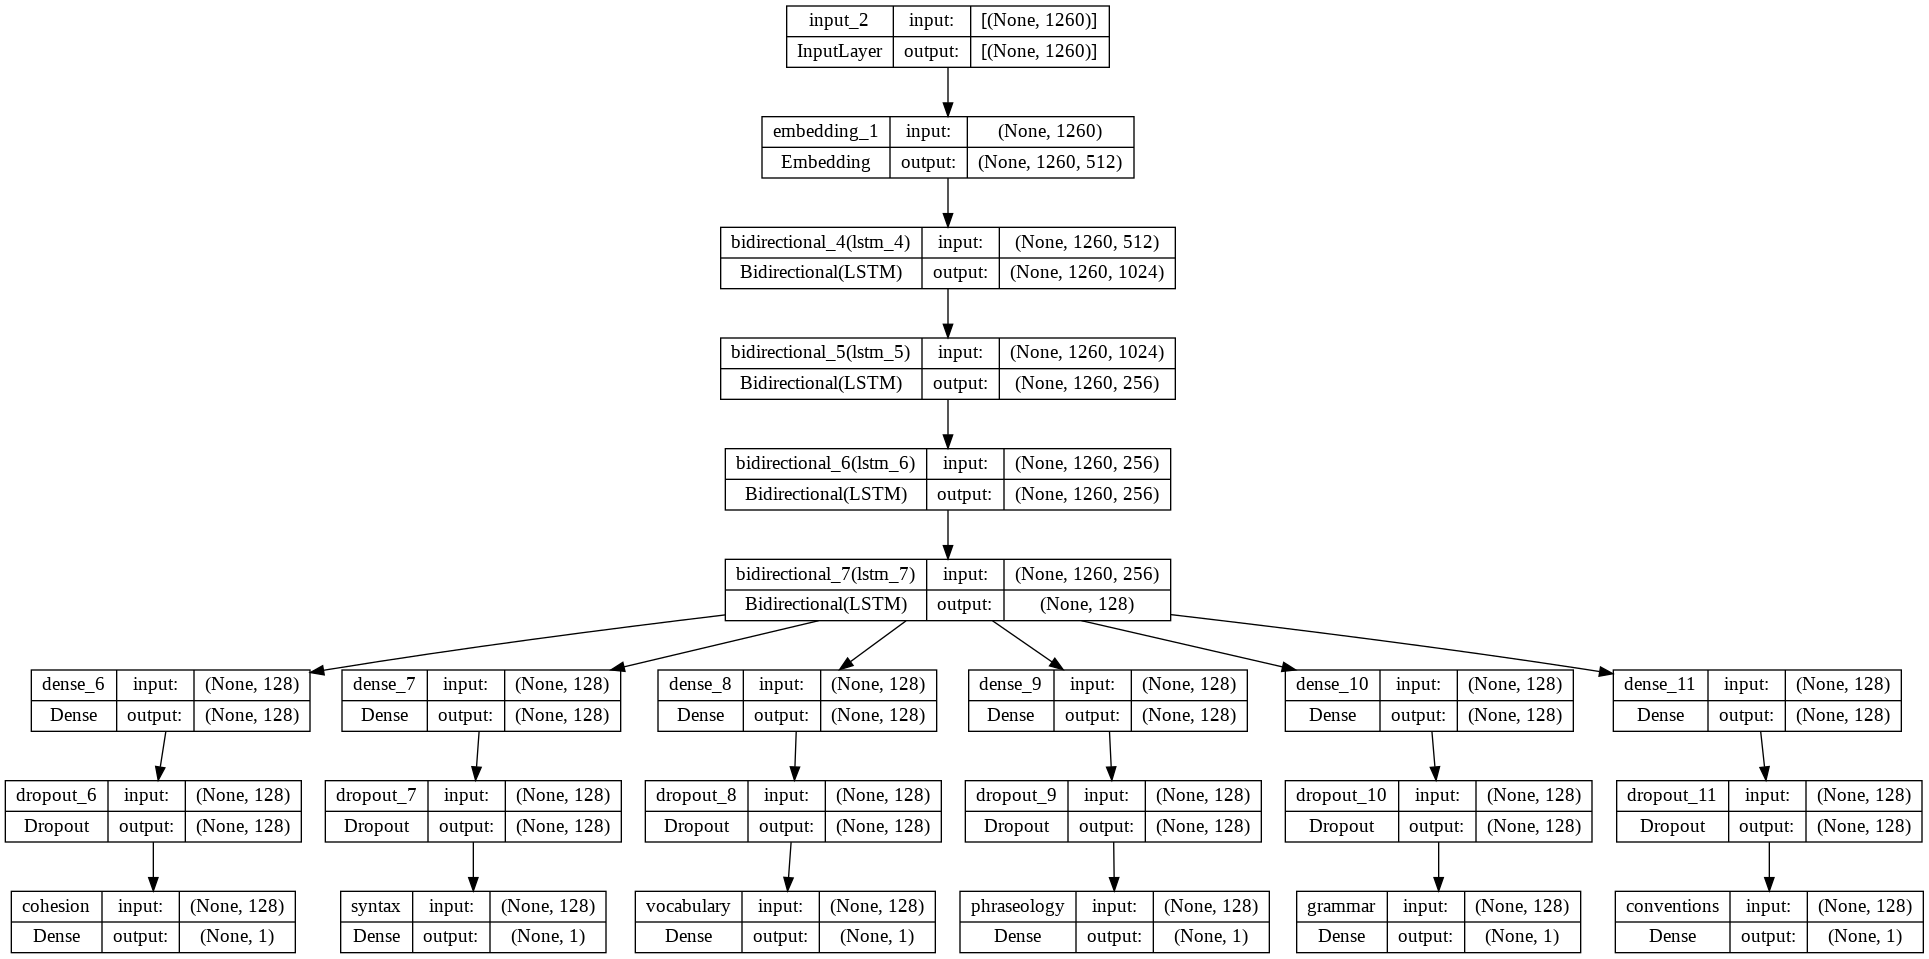

In [35]:
tf.keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True, to_file="modelstm.png")

In [38]:

#Direcciones y constantes de callbacks
WORKSPACE_FOLDER_PATH = ""
OUTPUT_FOLDER_NAME = "Outputs"
STOPPING_PATIENCE = 2  # Epochs
LR_PATIENCE = 4  # Epochs
MODEL_NAME = "modelo"


In [39]:
def create_callbacks(output_folder_path, model_name, stopping_patience, lr_patience):
  
  from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, os
  csv_logger = CSVLogger(os.path.join(output_folder_path, f"training_sequences_{model_name}.csv"))
  early_stopping = EarlyStopping(patience=stopping_patience, verbose=1, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint(os.path.join(output_folder_path, f"best_{model_name}.hdf5"),
    verbose=1,
    save_best_only=True
  )
  reduce_lr = ReduceLROnPlateau(factor=0.5, patience=lr_patience, min_lr=0.05)

  return [csv_logger, early_stopping, model_checkpoint, reduce_lr]

callbacks = create_callbacks(
  os.path.join(WORKSPACE_FOLDER_PATH, OUTPUT_FOLDER_NAME),
  MODEL_NAME,
  STOPPING_PATIENCE,
  LR_PATIENCE
)

In [40]:
historia = modelo.fit(X_train, y, epochs=10,  shuffle=True, validation_split=0.2, verbose=1, callbacks = callbacks)

Epoch 1/10
98/98 [==============================] - ETA: 0s - loss: 6.3960 - cohesion_loss: 1.1984 - syntax_loss: 1.0166 - vocabulary_loss: 0.9756 - phraseology_loss: 1.0521 - grammar_loss: 1.0553 - conventions_loss: 1.0980
Epoch 1: val_loss improved from inf to 2.56881, saving model to Outputs/best_modelo.hdf5
98/98 [==============================] - 94s 826ms/step - loss: 6.3960 - cohesion_loss: 1.1984 - syntax_loss: 1.0166 - vocabulary_loss: 0.9756 - phraseology_loss: 1.0521 - grammar_loss: 1.0553 - conventions_loss: 1.0980 - val_loss: 2.5688 - val_cohesion_loss: 0.4655 - val_syntax_loss: 0.4057 - val_vocabulary_loss: 0.3388 - val_phraseology_loss: 0.4131 - val_grammar_loss: 0.5109 - val_conventions_loss: 0.4347 - lr: 0.0010
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 3.5791 - cohesion_loss: 0.6328 - syntax_loss: 0.5528 - vocabulary_loss: 0.5105 - phraseology_loss: 0.6000 - grammar_loss: 0.6421 - conventions_loss: 0.6409
Epoch 2: val_loss did not improve from

In [41]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(modelo, files)

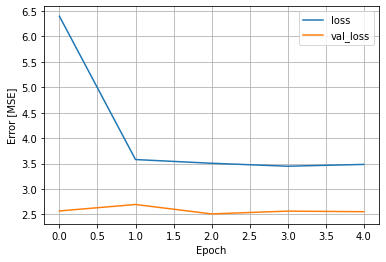

In [42]:
plt.plot(historia.history['loss'], label='loss')
plt.plot(historia.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [43]:
modelo.save('lstm_model.h5')

In [46]:
test_seq = tokenizer.texts_to_sequences(clean_test['full_text'])
pad_test = pad_sequences(test_seq, maxlen=max_pala, truncating='post')

X_test = pad_test
results = modelo.predict(X_test)
lstm_submission = pd.DataFrame()
lstm_submission['text_id'] = clean_test['text_id']
for i in range(6):
    lstm_submission[i] = pd.Series([float(x) for x in results[i]])
lstm_submission.columns = clean_train.drop(columns=['full_text']).columns
lstm_submission['text_id'] = clean_test['text_id']

lstm_submission.head()

1/1 [==============================] - 0s 387ms/step


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.163812,2.945035,3.214523,3.091816,2.961098,3.088573
1,000BAD50D026,3.163838,2.944865,3.214521,3.091801,2.961279,3.088467
2,00367BB2546B,3.163745,2.945089,3.214517,3.091807,2.961031,3.088581


In [ ]:
lstm_submission.to_csv('submission.csv', index=False)